#Uso de word embeddings
En este notebook utilizaremos un conjunto de Word embeddings en español para ver como podemos usarlo y para que tareas servirían

In [1]:
import os, re
import nltk
import pandas as pd
import sklearn
import gensim
from sklearn import manifold
import seaborn as sns


Importamos el archivo de Word embeddings

In [2]:
from gensim.models import KeyedVectors
os.chdir("/content/drive/My Drive/corpus/Otros_texto")
modelo = KeyedVectors.load_word2vec_format('SBW-vectors-300-min5.bin.gz', binary=True)



Podemos calcular los *k* vecinos más cercanos a una palabra

In [3]:
#similitudes de una palabra
similitud=modelo.similar_by_word("alimenticio", topn=50, restrict_vocab=300000)
similitud


[('alimentario', 0.7926660180091858),
 ('dietético', 0.6628463268280029),
 ('alimenticios', 0.622776985168457),
 ('alimento', 0.6160340905189514),
 ('nutricional', 0.6138904094696045),
 ('nutritivo', 0.6030381917953491),
 ('nutritivas', 0.5713232159614563),
 ('nutricionales', 0.5702104568481445),
 ('nutrimental', 0.5639524459838867),
 ('alimentos', 0.5576946139335632),
 ('medicamentoso', 0.5559772253036499),
 ('alimentarios', 0.552754282951355),
 ('mayonesas', 0.5521297454833984),
 ('cárnico', 0.545059084892273),
 ('lácteo', 0.5445378422737122),
 ('vitamínico', 0.5420364141464233),
 ('prebióticos', 0.540791928768158),
 ('agroquímico', 0.5301522612571716),
 ('nutritivos', 0.5268266201019287),
 ('endulzante', 0.5267912149429321),
 ('endulzantes', 0.5261530876159668),
 ('calórico', 0.5244935154914856),
 ('Depuralina', 0.5221548080444336),
 ('alergénico', 0.5217621326446533),
 ('nutritiva', 0.5213720798492432),
 ('tisanas', 0.5211535692214966),
 ('vitamínicas', 0.5199116468429565),
 ('pulp

Sin embargo, los resultados pueden estar sesgados por la cultura y por los sesgos que los seres humanos ya tenemos. Por ejemplo

In [4]:
similitud2=modelo.similar_by_word("mujer", topn=50, restrict_vocab=300000)
similitud2


[('niña', 0.7468613982200623),
 ('muchacha', 0.7343084216117859),
 ('persona', 0.721770703792572),
 ('hombre', 0.717448353767395),
 ('fémina', 0.7114294171333313),
 ('anciana', 0.7081663012504578),
 ('joven', 0.7036719918251038),
 ('jovencita', 0.7007800936698914),
 ('marido', 0.6902620196342468),
 ('esposo', 0.687350869178772),
 ('esposa', 0.674560010433197),
 ('prostituta', 0.6566932797431946),
 ('embarazada', 0.6501801609992981),
 ('sexagenaria', 0.6497166156768799),
 ('madre', 0.6432695984840393),
 ('chica', 0.6407369375228882),
 ('adolescente', 0.6385994553565979),
 ('pareja', 0.636317253112793),
 ('septuagenaria', 0.631632924079895),
 ('cuarentona', 0.6294296979904175),
 ('hija', 0.6284516453742981),
 ('ella', 0.6271185874938965),
 ('parapléjica', 0.6244871616363525),
 ('hijastra', 0.6232087016105652),
 ('acuchillada', 0.6231945753097534),
 ('mujeres', 0.6229809522628784),
 ('sirvienta', 0.6219693422317505),
 ('cuñada', 0.6205693483352661),
 ('víctima', 0.6180682182312012),
 ('tr

Probemos con el que usted desee

In [5]:
similitud3=modelo.similar_by_word("vehículo", topn=50, restrict_vocab=300000)
similitud3


[('automóvil', 0.8449662327766418),
 ('camión', 0.8032729625701904),
 ('camioneta', 0.7934374809265137),
 ('coche', 0.7672141790390015),
 ('motocicleta', 0.7655366659164429),
 ('carro', 0.7342464923858643),
 ('conductor', 0.7216777801513672),
 ('vehículos', 0.7185602188110352),
 ('ecotaxi', 0.7152096033096313),
 ('Sentra', 0.7135574221611023),
 ('furgoneta', 0.7122205495834351),
 ('chofer', 0.7118712663650513),
 ('Jeep', 0.7111682891845703),
 ('vehiculo', 0.7103638648986816),
 ('tsuru', 0.7031404376029968),
 ('torton', 0.7029311656951904),
 ('Tsuru', 0.7020263671875),
 ('microbús', 0.7014415264129639),
 ('todoterreno', 0.6987150311470032),
 ('Jetta', 0.695485532283783),
 ('automovilista', 0.6918030977249146),
 ('estaquitas', 0.6878707408905029),
 ('ciclomotor', 0.6848747134208679),
 ('chocada', 0.68404620885849),
 ('Tiida', 0.6826857924461365),
 ('Xtrail', 0.6825708150863647),
 ('Tida', 0.6818996667861938),
 ('midibús', 0.6812483668327332),
 ('estacionado', 0.6802089214324951),
 ('cond

En principio los vectores se pueden *operar*, lo que implica que si a rey lo resto de hombre y le sumo mujer, debiera obtener algo similar a una reina:
reina=rey-hombre+mujer

In [6]:
##similitudes en relación
analogia1=modelo.most_similar(positive=["rey", "mujer"],negative=["hombre"], topn=5, restrict_vocab=300000)
analogia1


[('reina', 0.7493031024932861),
 ('consorte', 0.7034263014793396),
 ('princesa', 0.6861542463302612),
 ('reyes', 0.6391465663909912),
 ('Eriksdotter', 0.6360354423522949)]

Funcionará cuando qiuero saber un componente de un todo?

In [7]:
analogia2=modelo.most_similar(positive=["trompeta", "rock"],negative=["jazz"], topn=5, restrict_vocab=300000)
analogia2


[('guitarra', 0.5890582799911499),
 ('banda', 0.5711548328399658),
 ('trompetas', 0.5636848211288452),
 ('tuba', 0.5532137751579285),
 ('trombón', 0.5528615713119507)]

En este caso, quizás por la polisemia, el resultado es malo

In [8]:
analogia3=modelo.most_similar(positive=["baloncesto", "fútbol"],negative=["aro"], topn=5, restrict_vocab=300000)
analogia3


[('voleibol', 0.6411385536193848),
 ('balonmano', 0.6357670426368713),
 ('rugby', 0.6266653537750244),
 ('futbol', 0.6047141551971436),
 ('Fútbol', 0.6009125709533691)]

También puedo detectar la palabra que no pertenece, mirando la de mayor distancia a la media de palabras.

In [9]:
##palabra extraña
modelo.doesnt_match("hombre mujer anciano oficina".split())


/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'oficina'

Probemos con otro conjunto

In [10]:
modelo.doesnt_match("pan carne trigo harina".split())

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'carne'

Puedo calcular directamente la similitud entre dos plabras , o su complemento, la distancia.

In [11]:
modelo.similarity("perro","casa")


0.3906009

In [12]:
modelo.distance("perro","gato")


0.25541186332702637

In [13]:
modelo.similarity("perro","gato")


0.74458814

Puedo extender esa similitud a grupos de palabras, porque los vectores se pueden operar, así que se pueden promediar.

In [14]:
simgrup = modelo.n_similarity(['sushi', 'tienda'], ['japón', 'restaurante'])
simgrup


0.75891757

Una aproximación más sofisticada permite ver el problema de distancia entre documentos como un **problema de transporte** donde los costos son las distancias entre palabras, los origenes y destinos las palabras en sí mismas, y los volúmenes a transportar las representaciones TF normalizadas con L1

In [18]:
frase1 = 'Estoy contento por mi ascenso'.lower().split()
frase2 = 'Me encuentro feliz por mi nuevo sueldo'.lower().split()
frase3 = "Me fui de vacaciones alegremente".lower().split()
similaridad12 = modelo.wmdistance(frase1, frase2)
similaridad13= modelo.wmdistance(frase2, frase3)
similaridad23= modelo.wmdistance(frase1, frase3)
print(similaridad12," ",similaridad13, " ",similaridad23)

2.5907873466401257   2.912638327704826   3.4011313330241197


Otra aplicación es visualizar grupos de palabras por similitudes. Con T-SNE hago una reducción de dimensiones basada en teoría de la información y puedo obtener una representación bidimensional de palabras para ser comparadas.

In [19]:
tsne=sklearn.manifold.TSNE(perplexity=3)
palabras=["salados","cocidas","chiles","puré","mermelada","salchicha","ahumado","hamburguesa","bollo","cocinados","pelado","picadas","piñones","churros","cocinan","tamal","cocidos","yema","molido","chicha","serrano","garbanzos","fideos","gallina","galletas","jamón","tortilla"]
vectors=modelo[palabras]

reduccion=tsne.fit_transform(vectors)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [20]:
base=pd.DataFrame()
base["primer_componente"]=reduccion[:,0]
base["segundo_componente"]=reduccion[:,1]
base["nombres"]=palabras
display(base)

,primer_componente,segundo_componente,nombres
0,-459.824158,108.057121,salados
1,-357.053894,268.967865,cocidas
2,219.204590,-41.811298,chiles
3,-13.653218,121.934097,puré
4,-11.872907,202.888290,mermelada
5,-111.490555,25.246271,salchicha
6,-161.494858,-158.297745,ahumado
7,-93.617393,-33.096535,hamburguesa
8,404.723358,-267.464600,bollo
9,-478.975433,210.034821,cocinados


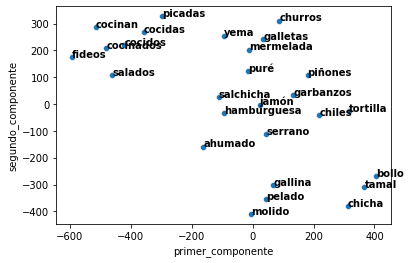

In [21]:
graf1=sns.scatterplot(x="primer_componente", y="segundo_componente", data=base)

for line in range(0,base.shape[0]):
     graf1.text(base.primer_componente[line]+0.01, base.segundo_componente[line], 
     base.nombres[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')